In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the csv file into the dataframe
df = pd.read_csv('covid_worldwide.csv')

In [3]:
# check the top 5 rows of the data
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [4]:
# check the last 5 rows of the dataset
df.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN
230,231,Tokelau,5,NaN,NaN,5,NaN,"1,378"


In [5]:
display(df.iloc[9])

Serial Number               10
Country                 Russia
Total Cases         21,958,696
Total Deaths           395,108
Total Recovered     21,356,008
Active Cases           207,580
Total Test         273,400,000
Population         145,805,947
Name: 9, dtype: object

In [6]:
# check the shape of the data
df.shape

(231, 8)

In [7]:
# check the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [8]:
# Convert numeric columns to numeric data type
numeric_cols = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']
for col in numeric_cols:
  df[col] = df[col].str.replace(',', '').astype(float)

In [9]:
# check the datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial Number    231 non-null    int64  
 1   Country          231 non-null    object 
 2   Total Cases      231 non-null    float64
 3   Total Deaths     225 non-null    float64
 4   Total Recovered  210 non-null    float64
 5   Active Cases     212 non-null    float64
 6   Total Test       213 non-null    float64
 7   Population       228 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 14.6+ KB


In [10]:
# number of missing values in each column
missing = df.isnull().sum()
print(missing)

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64


In [11]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Print the result
print(missing_percentage)

Serial Number      0.000000
Country            0.000000
Total Cases        0.000000
Total Deaths       2.597403
Total Recovered    9.090909
Active Cases       8.225108
Total Test         7.792208
Population         1.298701
dtype: float64


In [12]:
# drop the missing values
df.dropna(inplace=True)

In [13]:
# verify there are no NA or NaN values in entire dataframe
df.isnull().values.any()

False

In [14]:
# check the summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial Number,195.0,1.071897e+02,6.430396e+01,1.0,51.5,104.0,162.0,2.250000e+02
Total Cases,195.0,3.329258e+06,1.019503e+07,1403.0,37865.5,297757.0,1723625.0,1.041969e+08
Total Deaths,195.0,3.378704e+04,1.125272e+05,1.0,313.0,3155.0,16877.0,1.132935e+06
Total Recovered,195.0,3.197261e+06,9.846399e+06,438.0,34699.5,288991.0,1708095.0,1.013228e+08
Active Cases,195.0,9.821017e+04,7.988122e+05,0.0,78.0,1253.0,10848.5,1.095262e+07
Total Test,195.0,3.375474e+07,1.220386e+08,7850.0,401044.0,2610114.0,14772746.5,1.159833e+09
Population,195.0,3.207370e+07,1.099820e+08,4965.0,1100457.0,6844597.0,27826923.0,1.406632e+09


In [15]:
# Get frequency of categorical column
df['Country'].value_counts()

USA              1
Bahamas          1
Malawi           1
Ivory Coast      1
New Caledonia    1
                ..
Panama           1
Mongolia         1
Nepal            1
Belarus          1
Montserrat       1
Name: Country, Length: 195, dtype: int64

In [16]:
# Get the proportion of categorical column
df['Country'].value_counts(normalize=True)

USA              0.005128
Bahamas          0.005128
Malawi           0.005128
Ivory Coast      0.005128
New Caledonia    0.005128
                   ...   
Panama           0.005128
Mongolia         0.005128
Nepal            0.005128
Belarus          0.005128
Montserrat       0.005128
Name: Country, Length: 195, dtype: float64

In [17]:
# Select only continuous variables
continuous_vars = df.select_dtypes(include='number')

# Generate the correlation matrix
corr_matrix = continuous_vars.corr()

# Print the correlation matrix
corr_matrix

,Serial Number,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
Serial Number,1.000000,-0.463011,-0.412296,-0.460312,-0.177270,-0.383558,-0.288476
Total Cases,-0.463011,1.000000,0.878457,0.997221,0.346938,0.842994,0.522161
Total Deaths,-0.412296,0.878457,1.000000,0.885198,0.159427,0.795416,0.572756
Total Recovered,-0.460312,0.997221,0.885198,1.000000,0.276273,0.851625,0.525893
Active Cases,-0.177270,0.346938,0.159427,0.276273,1.000000,0.149469,0.101207
Total Test,-0.383558,0.842994,0.795416,0.851625,0.149469,1.000000,0.665094
Population,-0.288476,0.522161,0.572756,0.525893,0.101207,0.665094,1.000000


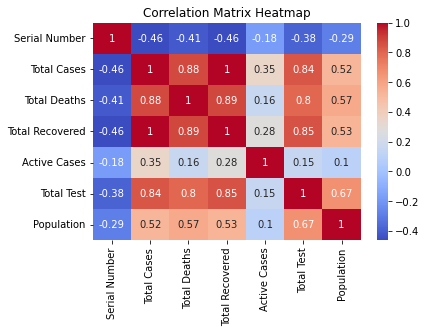

In [18]:
# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

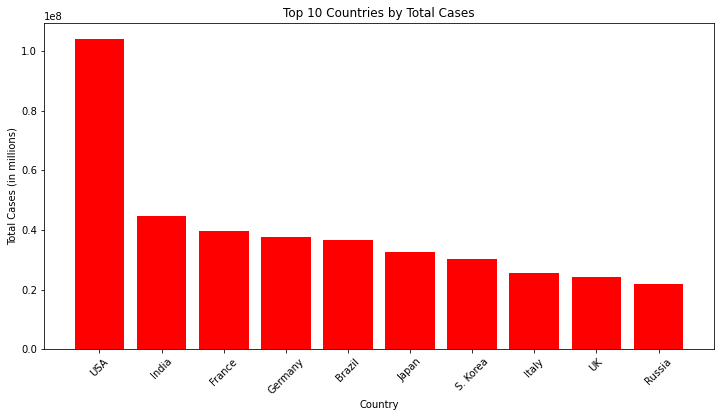

In [19]:
top_10_cases = df.sort_values(by='Total Cases', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_10_cases['Country'], top_10_cases['Total Cases'], color='red')
plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases (in millions)')
plt.xticks(rotation=45)
plt.show()

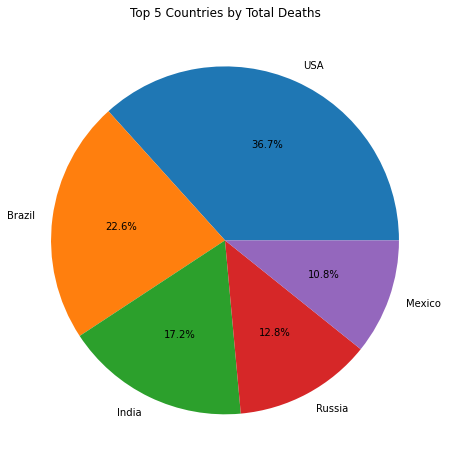

In [20]:
top_5_deaths = df.sort_values(by='Total Deaths', ascending=False).head(5)
plt.figure(figsize=(8,8))
plt.pie(top_5_deaths['Total Deaths'], labels=top_5_deaths['Country'], autopct='%1.1f%%')
plt.title('Top 5 Countries by Total Deaths')
plt.show()


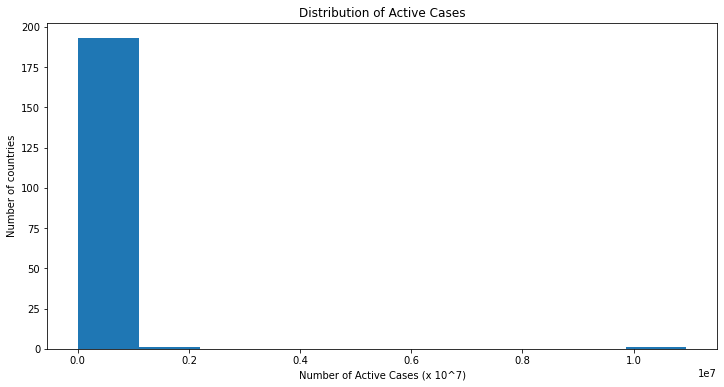

In [27]:
plt.figure(figsize=(12,6))
plt.hist(df['Active Cases'])
plt.title('Distribution of Active Cases')
plt.xlabel('Number of Active Cases (x 10^7)')
plt.ylabel('Number of countries')
plt.show()